<h2>
    <span style="color: blue;"> Name:</span>
</h2>
<h4>
   <span style="color: blue;"> 
   <ol>
  <li>SEAN VENGNGY (Leader)</li>
  <li>Ven Vannuth</li>
  <li>Sok Sopheak</li>
  <li>SOBON MENGHORNG</li>
  <li>Seng Vathanak</li>
  <li>THOU CHANMAKARA</li>
   </ol>
   </span> 
<h4>

## Import library 

**Python Libraries** | **Purpose**
------------ | -------------
pandas | For storing and acquire data in tables
requests | To get HTML data from the websites
bs4 | To create a soup object for extracting desired data from websites

In [4]:
from urllib.request import Request, urlopen
from bs4 import BeautifulSoup 
import requests
from urllib.parse import quote
import pandas as pd
import numpy as np

#### Test for first page  

In [5]:
# get url from specifice website
khmer24_url = "https://www.khmer24.com/en/cars/all-cars.html?per_page=0"
headers = {
    "User-Agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Mobile Safari/537.36"
}
req = Request(khmer24_url, headers=headers)
uClien = urlopen(req)

In [6]:
# open page unstructure of html
khmer24_page = uClien.read().strip()
khmer24_page

b'<!DOCTYPE html>\r\n<html lang="en">\r\n\t<head >\r\n\t\t<meta name="google-site-verification" content="Vj3nFdA-uZGZFOP3ZajI-jYDUUPyNZL-EMAE5WbY94A" />\r\n\t\t<meta charset="UTF-8">\r\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n\t\t<meta name="theme-color" content="#028dcf" />\r\n\t\t\t\t\r\n\t\t\t<meta name="viewport" content="width=device-width">\r\n\t\t\t\t\r\n\t\t<link rel="shortcut icon" href="https://www.khmer24.com/favicon.ico">\r\n\t\t<!-- <link href="https://fonts.googleapis.com/css?family=Hanuman" rel="stylesheet"> -->\r\n\t\t<!--[if lt IE 9]>\r\n\t\t  <script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>\r\n\t\t<![endif]-->\r\n\t\t<title>New and Used  Cars For Sale in Cambodia - Khmer24.com</title>\r\n\t\t\t\t\t<meta name="keywords" content="cars for Sale, used car, new car, second hand car, car price, Toyota car, Honda car, Lexus car, Ford car, Kia car, Cars for Sale in Cambodia">\r\n\t\t\t\t\t\t\t<meta name="description" conten

In [7]:
# Using beautifulsuop to get html structure
khmer24_html = BeautifulSoup(khmer24_page, 'html.parser')
print(khmer24_html.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="Vj3nFdA-uZGZFOP3ZajI-jYDUUPyNZL-EMAE5WbY94A" name="google-site-verification"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="#028dcf" name="theme-color">
   <meta content="width=device-width" name="viewport"/>
   <link href="https://www.khmer24.com/favicon.ico" rel="shortcut icon"/>
   <!-- <link href="https://fonts.googleapis.com/css?family=Hanuman" rel="stylesheet"> -->
   <!--[if lt IE 9]>
		  <script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
		<![endif]-->
   <title>
    New and Used  Cars For Sale in Cambodia - Khmer24.com
   </title>
   <meta content="cars for Sale, used car, new car, second hand car, car price, Toyota car, Honda car, Lexus car, Ford car, Kia car, Cars for Sale in Cambodia" name="keywords"/>
   <meta content="Buy or sell new and used car in Cambodia on Khmer24." name="description"/>
   <script src="https://www.khmer24.com/

In [8]:
boxs_car = khmer24_html.findAll('li', {'class': 'item'})
boxs_car

[<li class="item item-sponsors text-center"><div style="height: 90px;"><!-- Revive Adserver Asynchronous JS Tag - Generated with Revive Adserver v5.0.4 -->
 <ins data-revive-id="015d25e957e6ef856e6d5cad1815bf26" data-revive-zoneid="199"></ins>
 <script async="" src="//banner.khmer24.ws/www/delivery/asyncjs.php"></script></div></li>,
 <li class="item special-item top-item">
 <a class="border post" href="https://www.khmer24.com/en/cars/ford-ranger-widtrak-2019-មចសទញខលញគ-មចសទ1-adid-9224749.html" title="Ford Ranger Widtrak  2019 ម្ចាស់ទិញខ្លាំញ់គោ ម្ចាស់ទី1">
 <article>
 <div class="item-image">
 <img alt="Ford Ranger Widtrak  2019 ម្ចាស់ទិញខ្លាំញ់គោ ម្ចាស់ទី1" class="img-cover lazy" data-cfsrc="https://www.khmer24.com//images/image-placeholder-256.png" data-src="https://images.khmer24.co/23-03-28/s-ford-ranger-widtrak-2019-1-272133167997930917556269-b.jpg" style="display:none;visibility:hidden;"><noscript><img alt="Ford Ranger Widtrak  2019 ម្ចាស់ទិញខ្លាំញ់គោ ម្ចាស់ទី1" class="img-cover l

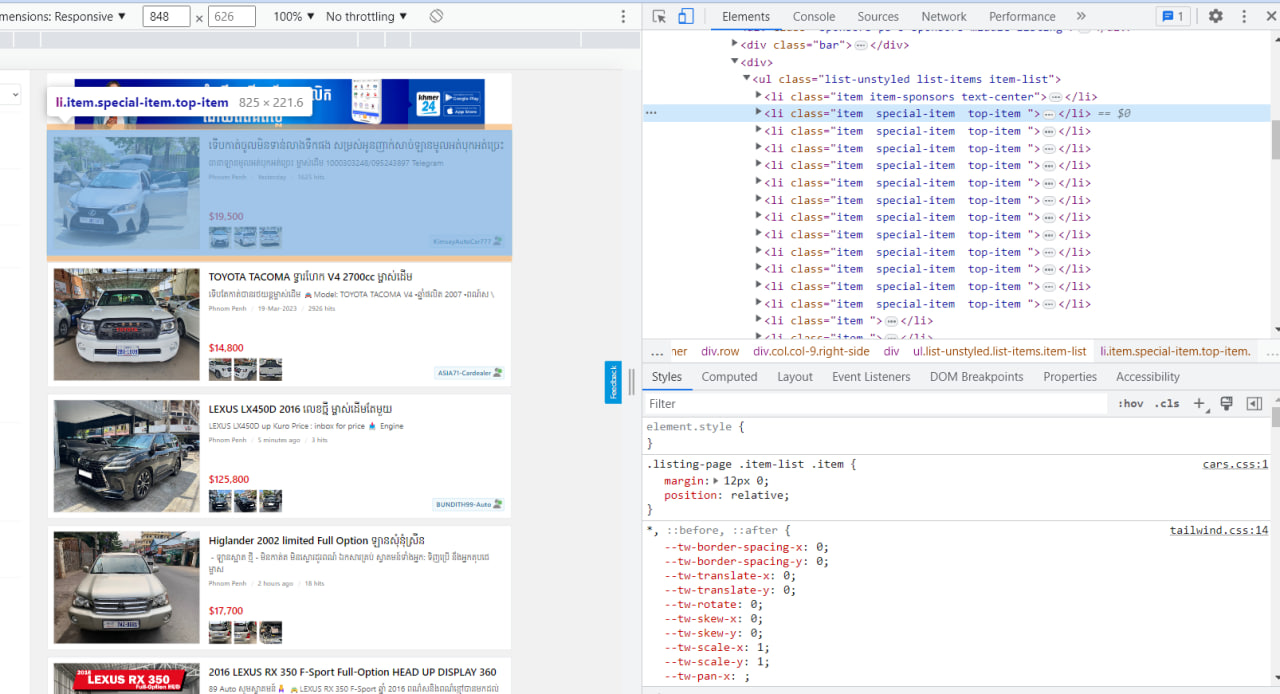

In [9]:
print("There are {} cars in this page".format(len(boxs_car)))

There are 54 cars in this page


In [10]:
del boxs_car[0]

In [11]:
# Link to each box of car
car_pro = quote(boxs_car[0].a['href'], safe='/:')
car_pro

'https://www.khmer24.com/en/cars/ford-ranger-widtrak-2019-%E1%9E%98%E1%9E%85%E1%9E%9F%E1%9E%91%E1%9E%89%E1%9E%81%E1%9E%9B%E1%9E%89%E1%9E%82-%E1%9E%98%E1%9E%85%E1%9E%9F%E1%9E%911-adid-9224749.html'

In [12]:
# Request again for each car link
car_request = Request(car_pro, headers = headers)
car_open_url = urlopen(car_request).read()
car_open_url

b' <!DOCTYPE html>\r\n<html lang="en">\r\n\t<head prefix="og: http://ogp.me/ns# \n\t\tfb: http://ogp.me/ns/fb# \n\t\tproduct: http://ogp.me/ns/product#">\r\n\t\t<meta name="google-site-verification" content="Vj3nFdA-uZGZFOP3ZajI-jYDUUPyNZL-EMAE5WbY94A" />\r\n\t\t<meta charset="UTF-8">\r\n\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n\t\t<meta name="theme-color" content="#028dcf" />\r\n\t\t\t\t\r\n\t\t\t<meta name="viewport" content="width=device-width">\r\n\t\t\t\t\r\n\t\t<link rel="shortcut icon" href="https://www.khmer24.com/favicon.ico">\r\n\t\t<!-- <link href="https://fonts.googleapis.com/css?family=Hanuman" rel="stylesheet"> -->\r\n\t\t<!--[if lt IE 9]>\r\n\t\t  <script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>\r\n\t\t<![endif]-->\r\n\t\t<title>Ford Ranger Widtrak  2019 \xe1\x9e\x98\xe1\x9f\x92\xe1\x9e\x85\xe1\x9e\xb6\xe1\x9e\x9f\xe1\x9f\x8b\xe1\x9e\x91\xe1\x9e\xb7\xe1\x9e\x89\xe1\x9e\x81\xe1\x9f\x92\xe1\x9e\x9b\xe1\x9e\xb6\xe1\x9f\x86

#### Repeat process as above 

In [13]:
car_html = BeautifulSoup(car_open_url, 'html.parser')
print(car_html.prettify())

<!DOCTYPE html>
<html lang="en">
 <head prefix="og: http://ogp.me/ns# 
		fb: http://ogp.me/ns/fb# 
		product: http://ogp.me/ns/product#">
  <meta content="Vj3nFdA-uZGZFOP3ZajI-jYDUUPyNZL-EMAE5WbY94A" name="google-site-verification"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="#028dcf" name="theme-color">
   <meta content="width=device-width" name="viewport"/>
   <link href="https://www.khmer24.com/favicon.ico" rel="shortcut icon"/>
   <!-- <link href="https://fonts.googleapis.com/css?family=Hanuman" rel="stylesheet"> -->
   <!--[if lt IE 9]>
		  <script src="https://oss.maxcdn.com/libs/html5shiv/3.7.0/html5shiv.js"></script>
		<![endif]-->
   <title>
    Ford Ranger Widtrak  2019 ម្ចាស់ទិញខ្លាំញ់គោ ម្ចាស់ទី1 Price $36500 in Phnom Penh, Cambodia - Kimsay Auto car 777 | Khmer24.com
   </title>
   <meta content="Used Car ford ranger-wildtrak 2019 Plate Number For Sale Price $36500 in , ford ranger-wildtrak in , Used ford ranger-wild

In [14]:
# After we get in car link
car_dis = car_html.find('ul', class_ = 'list-unstyled item-fields')
car_dis

<ul class="list-unstyled item-fields">
<li><div><span class="title">Car Makes:</span><span class="value">Ford</span></div></li><li><div><span class="title">Car Model:</span><span class="value">Ranger Wildtrak</span></div></li><li><div><span class="title">Year:</span><span class="value">2019</span></div></li><li><div><span class="title">Tax Type:</span><span class="value">Plate Number</span></div></li><li><div><span class="title">Condition:</span><span class="value">Used</span></div></li><li><div><span class="title">Fuel:</span><span class="value">Diesel</span></div></li><li><div><span class="title">Transmission:</span><span class="value">Auto</span></div></li><li><div><span class="title">Color:</span><span class="value">White</span></div></li> </ul>

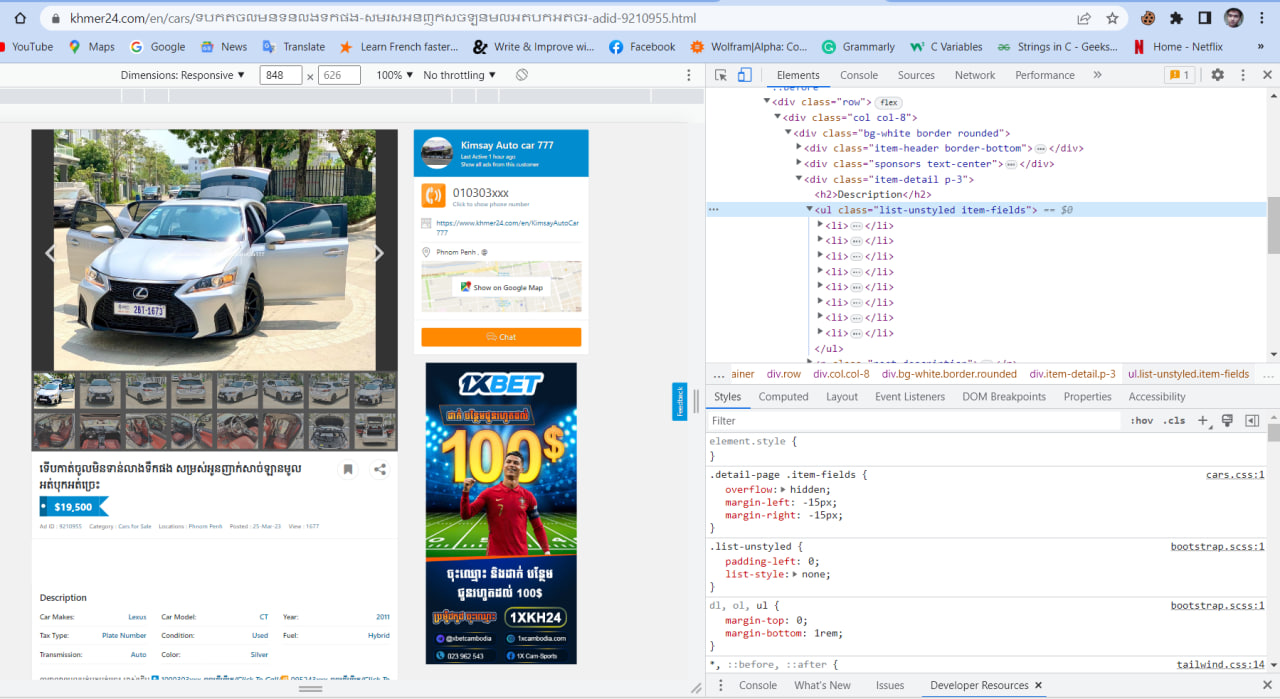

In [15]:
# Find detail information 
car_detail = car_dis.findAll('li')
car_detail

[<li><div><span class="title">Car Makes:</span><span class="value">Ford</span></div></li>,
 <li><div><span class="title">Car Model:</span><span class="value">Ranger Wildtrak</span></div></li>,
 <li><div><span class="title">Year:</span><span class="value">2019</span></div></li>,
 <li><div><span class="title">Tax Type:</span><span class="value">Plate Number</span></div></li>,
 <li><div><span class="title">Condition:</span><span class="value">Used</span></div></li>,
 <li><div><span class="title">Fuel:</span><span class="value">Diesel</span></div></li>,
 <li><div><span class="title">Transmission:</span><span class="value">Auto</span></div></li>,
 <li><div><span class="title">Color:</span><span class="value">White</span></div></li>]

In [16]:
# Test for first index
car_detail[0].text

'Car Makes:Ford'

In [17]:
# Get car discription data
for i in range(len(car_detail)):
    a = car_detail[i].text
    print(a.split(':')[1])

Ford
Ranger Wildtrak
2019
Plate Number
Used
Diesel
Auto
White


In [20]:
def car_scraping_data(number_of_page):
    cars_link_ls = []
    headers = {
        "User-Agent": "Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Mobile Safari/537.36"
    }
    for i in range(0,number_of_page*50,50):
        try:
                khmer24_url = 'https://www.khmer24.com/en/cars/all-cars.html?per_page={}'.format(str(i))
                Respon = Request(khmer24_url, headers=headers)
                uClien = urlopen(Respon)
                khmer24_cars = uClien.read().decode('utf-8')
                uClien.close()
                khmer24_html = BeautifulSoup(khmer24_cars, 'html.parser')
                cardatas = khmer24_html.findAll('li', {'class': 'item'})
        except: pass
        
        for i in range(len(cardatas)):
            try:
                car_ln = cardatas[i].a['href']
                car_link = quote(car_ln.encode('utf8'), safe='/:')
            except: pass
            try:
                cars_link_ls.append(car_link)
            except: pass
            
    cars_data = []
    for i in range(len(cars_link_ls)):
        try:
            car           = Request(cars_link_ls[i], headers = headers)
            car_page      = urlopen(car).read()
            car_html      = BeautifulSoup(car_page, 'html.parser')
            car_box       = car_html.find('ul', {'class': 'list-unstyled item-fields'})
            car_discrip   = car_box.findAll('li')

            car_mark      = car_discrip[0].text
            car_model     = car_discrip[1].text
            car_year      = car_discrip[2].text
            car_type      = car_discrip[3].text
            car_condition = car_discrip[4].text
            car_fuel      = car_discrip[5].text
            car_Tran      = car_discrip[6].text
            car_color     = car_discrip[7].text
            car_price     = car_html.find('b', class_ = 'price').text
            cars_data.append([car_mark, car_model, car_year, car_type, car_condition, car_fuel, car_Tran, car_color, car_price])
        except: pass
    df = pd.DataFrame(cars_data, columns=['mark', 'model', 'year', 'type', 'condition','fuel', 'Transmission', 'color', 'price'])
    return df.to_csv('cardata{}.csv'.format(''.join([str(i) for i in np.random.randint(0,100, size = 1)])))

In [ ]:
# Numbers of Pages
car_scraping_data(1)

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [58]:
pd.read_csv('cardata71.csv')

,Unnamed: 0,mark,model,year,type,condition,fuel,Transmission,color,price
0,0,Car Makes:Ford,Car Model:Ranger Wildtrak,Year:2019,Tax Type:Plate Number,Condition:Used,Fuel:Diesel,Transmission:Auto,Color:White,"$36,500"
1,1,Car Makes:Toyota,Car Model:Tacoma,Year:2007,Tax Type:Plate Number,Condition:Used,Body Type:Pickup,Fuel:Petrol,Transmission:Auto,"$14,800"
2,2,Car Makes:Kia,Car Model:Morning,Year:2020,Tax Type:Plate Number,Condition:Used,Body Type:Other,Fuel:Petrol,Transmission:Auto,"$16,400.00"
3,3,Car Makes:Toyota,Car Model:Alphard,Year:2015,Tax Type:Tax Paper,Condition:New,Body Type:MPV (Minivan),Fuel:Petrol,Transmission:Auto,"$76,500"
4,4,Car Makes:Lexus,Car Model:LX450d,Year:2016,Tax Type:Plate Number,Condition:Used,Fuel:Diesel,Transmission:Auto,Color:Black,"$125,800"
5,5,Car Makes:Toyota,Car Model:Highlander,Year:2002,Tax Type:Tax Paper,Condition:Used,Body Type:Other,Fuel:Petrol,Transmission:Manual,"$17,650"
6,6,Car Makes:Lexus,Car Model:RX350,Year:2016,Tax Type:Tax Paper,Condition:New,Body Type:Other,Fuel:Petrol,Color:Other,"$85,500"
7,7,Car Makes:Lexus,Car Model:RX330,Year:2004,Tax Type:Plate Number,Condition:Used,Body Type:Sports,Fuel:Petrol,Transmission:Auto,"$22,500"
8,8,Car Makes:Toyota,Car Model:Prius,Year:2010,Tax Type:Tax Paper,Condition:New,Body Type:Sedan,Fuel:Hybrid,Transmission:Auto,"$18,800"
9,9,Car Makes:Toyota,Car Model:Highlander,Year:2002,Tax Type:Plate Number,Condition:Used,Body Type:SUV,Fuel:Petrol,Transmission:Auto,"$15,500"
